In [1]:
import pandas as pd
import numpy as np

# 一、迭代器与生成器
参考：
1. [菜鸟教程](https://www.runoob.com/python3/python3-iterator-generator.html)
2. [廖雪峰](https://www.liaoxuefeng.com/wiki/1016959663602400/1017318207388128)

## 1.1 迭代器
* 迭代器是一个可以记住遍历的位置的对象，字符串，列表或元组对象都可用于创建迭代器

* 迭代器对象从集合的第一个元素开始访问，
直到所有的元素被访问完结束。迭代器只能往前不会后退。

### 1.1.1 迭代器的创建
把一个类作为一个迭代器使用需要在类中实现两个方法 `__iter__()` 与 `__next__() `。
*  `__iter__()` : 返回一个特殊的迭代器对象， 这个迭代器对象实现了 `__next__()` 方法
并通过 StopIteration 异常标识迭代的完成

* `__next__()`: 会返回下一个迭代器对象

* **StopIteration**：StopIteration 异常用于标识迭代的完成，防止出现无限循环的情况，
在 `__next__()` 方法中我们可以设置在完成指定循环次数后触发 StopIteration 异常来结束迭代。

### 1.1.2 迭代器的使用
1. `for i in iter(类实例化后的实例)`:
    * 执行第一次for时会先执行`__iter__()`里面的内容；
    * 然后再执行`__next__()`里面的内容，i取得`__next__()`的返回值；
    * 除了第一次的for遍历，后面都是直接执行`__next__()`里面的内容
2. `iter()` 和 `next()`
    * iter执行实例化迭代器的`__iter__()`函数；
    * next执行实例化迭代器的`__next__()`函数；

In [4]:
class MyNum():
    def __init__(self):
        print("init")
        
    def __iter__(self):
        print('__iter__')
        self.a = 1
        return self
    
    def __next__(self):
        print('__next__')
        if self.a <= 5:
          x = self.a
          self.a += 1
          return self.a
        else:
          raise StopIteration
mynum = MyNum()
myiter = iter(mynum)
next(mynum)
# for i in myiter:
#     print(i)
# next(myiter)




init
__iter__
__next__


2

## 1.2 生成器（generator）
使用了 yield 的函数被称为生成器。
跟普通函数不同的是，生成器是一个返回迭代器的函数，只能用于迭代操作，
更简单点理解生成器就是一个迭代器。

在调用生成器运行的过程中，每次遇到 yield 时函数会**暂停并保存**当前所有的运行信息，
返回 yield 的值, 并在下一次执行 next() 方法时从当前位置继续运行。

调用一个生成器函数，返回的是一个迭代器对象。

In [12]:
import sys
 
def fibonacci(n): # 生成器函数 - 斐波那契
    a, b, counter = 0, 1, 0
    while True:
        if (counter > n): 
            return
        yield a
        a, b = b, a + b
        counter += 1
f = fibonacci(10) # f 是一个迭代器，由生成器返回生成
 
while True:
    try:
        print (next(f), end=" ")
    except StopIteration:
        sys.exit()

0 1 

KeyboardInterrupt: 

In [15]:
def fibonacci(n,w=0): # 生成器函数 - 斐波那契
    a, b, counter = 0, 1, 0
    while True:
        if (counter > n): 
            return
        yield a
        a, b = b, a + b
        print('%d,%d' % (a,b))
        counter += 1
f = fibonacci(10,0) # f 是一个迭代器，由生成器返回生成

while True:
    try:
        print (next(f), end=" ")
    except:
        pass

0 1,1


# 一般迭代器、生成器的使用方法





## \_\_iter\_\_，\_\_next\_\_

```python
class sample1():
    def __init__(self):
        pass
    def __iter__(self):
        return self
    def __next__(self):
        return x

sam_iter = iter(sample1)
next(sam_iter)
# 或者
sam_iter = iter(sample()) # 一会for遍历会重新执行__iter__ func，所以也可以写成：sam_iter = sample()
for idx,i in enumerate(sam_iter):
    print(i)
```
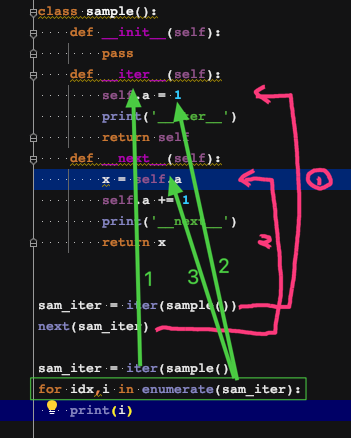

## \_\_iter\_\_，yield

```python
class sample2():
    def __init__(self):
        pass
    def __iter__(self):
        yield x

sam = sample2()
next(sam) # 会去找__next__函数，会报错

sam_iter = iter(sample2()) #并没有执行iter里面的函数
next(sam_iter) #执行__iter__里面的函数

# 或者
sam_iter = sample2()
for idx,i in enumerate(sam_iter):
    print(i)
```
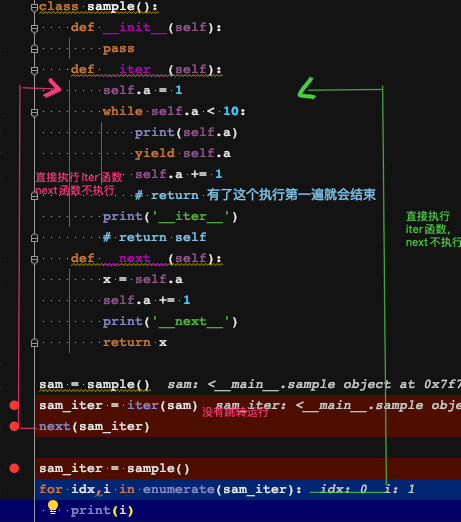

## \_\_iter\_\_，yield from

**`yield from g` is equivalent to `for v in g: yield v`**

```python
class sample3():
    def __init__(self):
        pass
    def __iter__(self): 
        yield from x # x 是个可迭代类型

sam_iter = iter(sample1)
next(sam_iter)
# 或者
sam_iter = iter(sample())
for idx,i in enumerate(sam_iter):
    print(i)
```
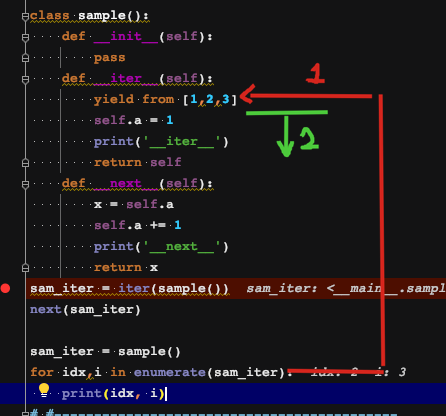

得到

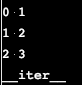